In [1]:
import pickle
import seaborn as sns

In [2]:
with open("measure-ours.pkl", "rb") as pkl:
    data = pickle.load(pkl)

data

,key,protocol,maximum_height,maximum_size,model_hum,protocol_hum,time,n_states,n_actions,n_transitions,alpha,gamma,horizon,value_eps,vi_start_value,vi_iter,vi_time
0,byz-3-ms-8,ethereum-bz-3,0,8,"sm.SelfishMining(EthereumByzantium(horizon=3),...",EthereumByzantium(horizon=3),44.166910,37724,7,100026,0.00,1.0,100,0.01,0.125000,16,1.704204
1,byz-3-ms-8,ethereum-bz-3,0,8,"sm.SelfishMining(EthereumByzantium(horizon=3),...",EthereumByzantium(horizon=3),44.166910,37724,7,100026,0.45,0.0,100,0.01,43.261263,696,41.235830
2,eth-2-ms-8,ethereum-wp-2,0,8,sm.SelfishMining(EthereumWhitepaper(horizon=2)...,EthereumWhitepaper(horizon=2),24.490540,20618,5,57328,0.30,0.0,100,0.01,34.321617,645,21.721598
3,eth-2-ms-8,ethereum-wp-2,0,8,sm.SelfishMining(EthereumWhitepaper(horizon=2)...,EthereumWhitepaper(horizon=2),24.490540,20618,5,57328,0.45,0.5,100,0.01,55.989894,766,25.869560
4,eth-2-ms-8,ethereum-wp-2,0,8,sm.SelfishMining(EthereumWhitepaper(horizon=2)...,EthereumWhitepaper(horizon=2),24.490540,20618,5,57328,0.00,0.5,100,0.01,0.125000,14,0.944099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,par-4-ms-9,parallel-4,0,9,"sm.SelfishMining(Parallel(k=4), alpha=0.125, g...",Parallel(k=4),21.254508,14397,9,50586,0.10,1.0,100,0.01,0.000000,1,0.311720
236,byz-2-ms-8,ethereum-bz-2,0,8,"sm.SelfishMining(EthereumByzantium(horizon=2),...",EthereumByzantium(horizon=2),24.105929,20572,5,57262,0.35,0.5,100,0.01,38.172908,637,20.968553
237,par-4-ms-9,parallel-4,0,9,"sm.SelfishMining(Parallel(k=4), alpha=0.125, g...",Parallel(k=4),21.254508,14397,9,50586,0.10,0.5,100,0.01,0.000000,1,0.322196
238,eth-2-ms-8,ethereum-wp-2,0,8,sm.SelfishMining(EthereumWhitepaper(horizon=2)...,EthereumWhitepaper(horizon=2),24.490540,20618,5,57328,0.40,1.0,100,0.01,49.480758,740,24.707839


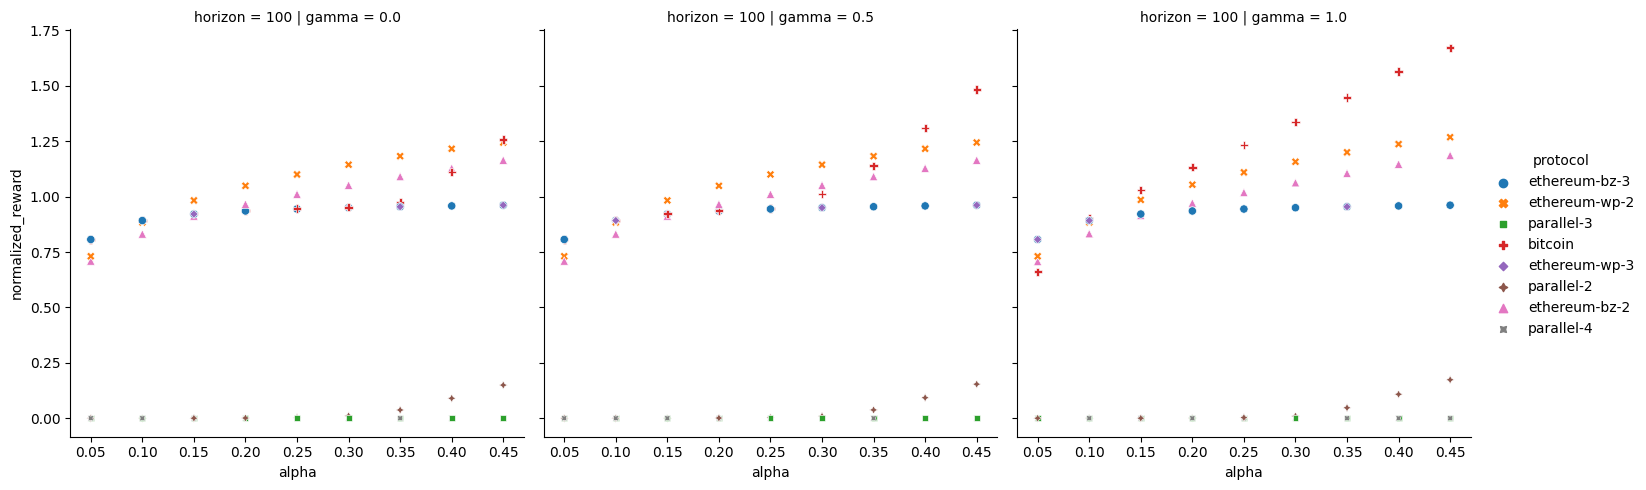

In [3]:
# Compare model w.r.t. reward
sns.relplot(
    data.assign(normalized_reward=lambda x: x.vi_start_value / x.horizon / x.alpha),
    x="alpha",
    y="normalized_reward",
    col="gamma",
    row="horizon",
    hue="protocol",
    style="protocol",
)